# MODEL TRAINNING 

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [38]:
X=pd.read_csv("train.csv")
Y=pd.read_csv("test.csv")

In [9]:
X=X.drop(['Unnamed: 0'],axis=1)
Y=Y.drop(['Unnamed: 0'],axis=1)

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((246008, 205), (61503, 205))

### MODEL TRAINNING AND PREDICTION

### Xgboost Classifier

In [12]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb = xgb.XGBClassifier(scale_pos_weight=11,objective="binary:logistic",learning_rate= 0.001, n_estimators= 100)
xgb.fit(X_train, Y_train)

C:\Users\bakayoko\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bakayoko\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
y_pred=xgb.predict(X_test)
y_pred_auc = xgb.predict_proba(X_test)[:,1]

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

roc_score = roc_auc_score(Y_test,y_pred_auc)
print("roc_auc_score: ",roc_score)

acc_score = accuracy_score(Y_test, y_pred)
print("Accuracy_score",acc_score)

roc_auc_score:  0.721021977303553
Accuracy_score 0.6527974245158773


In [15]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.65      0.78     56554
           1       0.14      0.67      0.24      4949

    accuracy                           0.65     61503
   macro avg       0.55      0.66      0.51     61503
weighted avg       0.89      0.65      0.73     61503



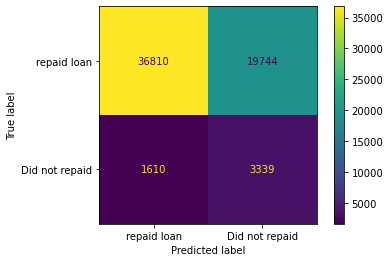

In [16]:
plot_confusion_matrix(xgb,
                       X_test,
                       Y_test,
                       values_format='d',
                       display_labels=['repaid loan' ,'Did not repaid'])

### RandomForest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 50, n_jobs = -1,class_weight="balanced")
RF.fit(X_train,Y_train)

<ipython-input-17-0e4d350c4c53>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=50)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_pred=RF.predict(X_test)
y_pred_auc =RF.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(Y_test,y_pred_auc)
print("roc_auc_score: ",roc_score)

acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy_score: ",acc_score)

roc_auc_score:  0.7216121091782931
Accuracy_score:  0.9195974180121295


In [19]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.61      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.77      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



### GradientBossting Classifier 

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
GB = GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
GB.fit(X_train, Y_train)

C:\Users\bakayoko\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(learning_rate=0.01)

In [22]:
y_pred=GB.predict(X_test)
y_pred_auc = GB.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(Y_test,y_pred_auc)
print("roc_auc_score: ",roc_score)

acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy_score: ",acc_score)

roc_auc_score:  0.713689574602345
Accuracy_score:  0.9195323805342829


# MLFLOW

#### MLFLOW On xgboost

In [23]:
import xgboost as xgb
from xgboost import XGBClassifier
from mlflow.utils.environment import _mlflow_conda_env
import os
import warnings
import sys
import mlflow
import mlflow.xgboost
from sklearn.metrics import accuracy_score

def train_xgboost(lr, n_estim):
    
    with mlflow.start_run(run_name='xgboost'):
               
        xgb =XGBClassifier(learning_rate= lr, n_estimators= n_estim, seed= 42, subsample= 1, colsample_bytree= 1,objective= 'binary:logistic',max_depth= 3,scale_pos_weight=11)
        xgb.fit(X_train, Y_train)
        mlflow.xgboost.autolog()
        
        y_pred_auc = xgb.predict_proba(X_test)[:,1]
        y_pred = xgb.predict(X_test)

       
        roc = roc_auc_score(Y_test, y_pred_auc)*100
        acc = accuracy_score(Y_test,y_pred)
       
        mlflow.log_metric("auc_roc",roc)
        mlflow.log_metric("accuracy_score",acc)
       
        
        mlflow.log_param('learning_rate', lr)
        mlflow.log_param('n_estimators', n_estim)
        mlflow.log_param('seed', 0)
        mlflow.log_param('subsample', 1)
        mlflow.log_param('colsamples_bytree', 1)
        mlflow.log_param('objective','binary:logistic')
        mlflow.log_param('max_depth', 3)
        mlflow.log_param('scale_pos_weight', 11)


        #log model
        mlflow.xgboost.log_model(xgb, "model")
        print("roc_auc",roc)
        print("accuracy_score",acc)
        

#### MLFLOW ON Random Forest 

In [24]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def train_random(numb_est):
     with mlflow.start_run(run_name='random forest'):
        
      
        RF = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")
        RF.fit(X_train,Y_train)
      
        mlflow.xgboost.autolog()
      
        
        y_pred_auc = RF.predict_proba(X_test)[:,1]
        y_pred = RF.predict(X_test)
        
      
       
       
        roc_auc = roc_auc_score(Y_test, y_pred_auc)*100
        acc = accuracy_score(Y_test,y_pred)
        
        
        mlflow.log_metric("auc_roc",roc_auc)
        mlflow.log_metric("accuracy_score",acc)
        
       
        
       
        mlflow.log_param('n_estimators', numb_est)
        mlflow.log_param('random_state', 50)
        mlflow.log_param('verbose', 1)
        mlflow.log_param('n_jobs', -1)
        mlflow.log_param('class_weight','balanced')
        


        # log model
        mlflow.sklearn.log_model(RF, "model")
        print("roc_auc",roc_auc)
        print("accuracy_score",acc)

#### MLFLOW ON GradientBoosting 

In [25]:
import mlflow.sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


def train_GB(lr, numb_est):
    with mlflow.start_run(run_name ='GrandientBoosting'):
        
        
        gbc = GradientBoostingClassifier(learning_rate = lr, n_estimators = numb_est, random_state=50)
        gbc.fit(X_train, Y_train)
      
        mlflow.xgboost.autolog()
      
        
        y_pred_auc = gbc.predict_proba(X_test)[:,1]
        y_pred = gbc.predict(X_test)

      
       
       
        roc = roc_auc_score(Y_test, y_pred_auc)*100
        acc = accuracy_score(Y_test,y_pred)
        
        
        mlflow.log_metric("auc_roc",roc)
        mlflow.log_metric("accuracy_score",acc)
        
       
        
        mlflow.log_param('learning_rate', lr)
        mlflow.log_param('n_estimators', numb_est)
        mlflow.log_param('random_state', 50)
        
        
        


        # log model
        mlflow.sklearn.log_model(gbc, "model")
        print("roc_auc",roc)
        print("accuracy_score",acc)

In [26]:
train_xgboost(0.0001,100)

C:\Users\bakayoko\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bakayoko\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:39:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc 68.51432316242357
accuracy_score 0.7316065882965058


In [27]:
train_random(100)

<ipython-input-24-9adfdbf3d619>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


roc_auc 72.16121091782931
accuracy_score 0.9195974180121295


In [28]:
train_GB(0.01,50)

C:\Users\bakayoko\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


roc_auc 70.5865605245935
accuracy_score 0.9195323805342829


# MODEL EXPLAINATION

In [29]:
import shap
shap.initjs()

In [30]:
import eli5
eli5.show_weights(G)

Weight,Feature
0.5024 ± 0.1871,x29
0.4386 ± 0.1486,x28
0.0383 ± 0.1689,x27
0.0131 ± 0.0658,x89
0.0034 ± 0.0319,x103
0.0017 ± 0.0153,x84
0.0012 ± 0.0124,x7
0.0005 ± 0.0079,x6
0.0003 ± 0.0079,x57
0.0003 ± 0.0075,x5


In [31]:
rand = X_train.sample(1000, random_state=42)

In [32]:
explainer = shap.TreeExplainer(GB)

In [33]:
shap_values = explainer.shap_values(rand)

In [34]:
feature_names=X_train.columns.tolist()

In [35]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


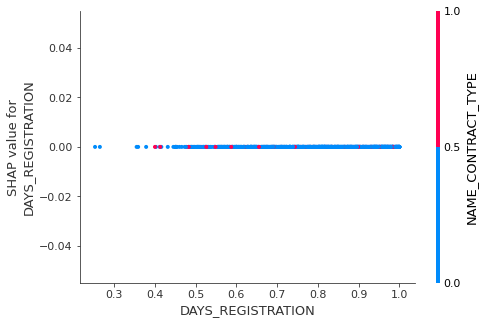

In [36]:
shap.dependence_plot("DAYS_REGISTRATION", shap_values, rand)

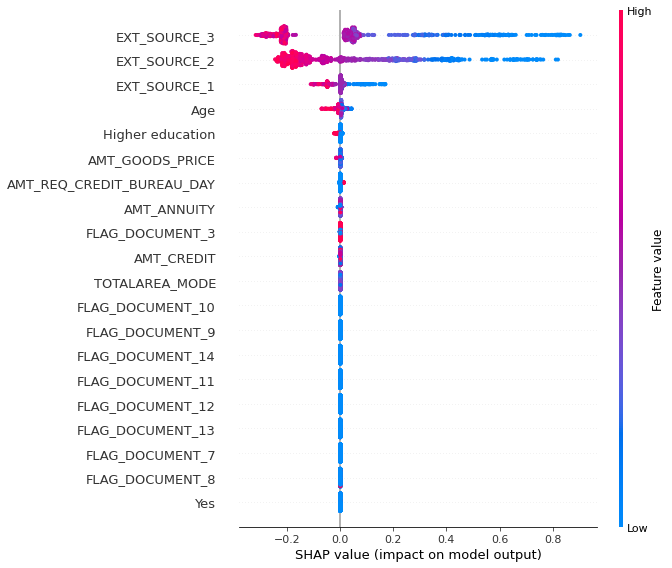

In [37]:
shap.summary_plot(shap_values, rand,feature_names= feature_names)